In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tf.VERSION
%matplotlib inline

In [15]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
               

In [16]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [26]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [27]:
model.compile(
    optimizer=tf.train.AdamOptimizer(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [28]:
model.fit(train_images, train_labels, epochs=15)

Epoch 1/15
60000/60000 [==============================] - 3s 51us/step - loss: 0.4815 - acc: 0.8247
Epoch 2/15
60000/60000 [==============================] - 3s 48us/step - loss: 0.3640 - acc: 0.8647
Epoch 3/15
60000/60000 [==============================] - 3s 48us/step - loss: 0.3307 - acc: 0.8773
Epoch 4/15
60000/60000 [==============================] - 3s 49us/step - loss: 0.3091 - acc: 0.8850
Epoch 5/15
60000/60000 [==============================] - 3s 48us/step - loss: 0.2893 - acc: 0.8917
Epoch 6/15
60000/60000 [==============================] - 3s 48us/step - loss: 0.2715 - acc: 0.8972
Epoch 7/15
60000/60000 [==============================] - 3s 48us/step - loss: 0.2603 - acc: 0.9023
Epoch 8/15
60000/60000 [==============================] - 3s 48us/step - loss: 0.2510 - acc: 0.9049
Epoch 9/15
60000/60000 [==============================] - 3s 48us/step - loss: 0.2399 - acc: 0.9089
Epoch 10/15
60000/60000 [==============================] - 3s 48us/step - loss: 0.2332 - acc: 0.9113

In [30]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Loss = %.2f  and test accuracy = %.2f' % (test_loss, test_acc))

60000/60000 [==============================] - 1s 21us/step
Loss = 0.19  and test accuracy = 0.93


In [31]:
predictions = model.predict(test_images)

In [32]:
predictions.shape

(10000, 10)

In [33]:
np.max(predictions[0])

0.99789065

In [34]:
np.argmax(predictions[0])

9

In [35]:
predictions[0]

array([4.6550336e-10, 3.1047708e-08, 7.2606445e-13, 2.1730280e-10,
       2.7358481e-14, 8.6127420e-06, 2.0337245e-12, 2.1006961e-03,
       1.8382863e-10, 9.9789065e-01], dtype=float32)

In [36]:
print(class_names[9])

Ankle boot


In [37]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

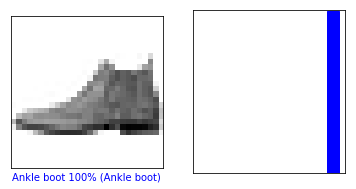

In [38]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)